In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# 1. Create a study guide for all the supervised learning models we have gone over. Include information about how the algorithms work, how they are evaluated, and any other information you deem necessary. Use your own words. Do NOT copy mine or that of articles we have read.

Supervised learning is a component of machine learning. The goal is to teach machines to predict an outcome, Y, with the highest accuracy based on the inputs it's been given, X. The machine or computer is provided a dataset that has be preprocessed/cleaned before teaching the machine to recognize patterns between X and Y to make predictions. The data is split into a training and testing set; train the machine on the training set, then test how accurate the predictive models are at making accurate predictions by using the unseen data, the test set.

**Supervised Learning Models**
- Classification techniques
1. KNN:
    - a nonparametric(no assumption for underlying data distribution) and lazy learning algorithm. It predicts the label of any unknown data point by looking at the K, the number of nearest neighbors, and the closest labeled data or neighbors votes on what label the unlabeled point should have. The class with the most votes determines the label
    - to find the nearest data points to the unknown data point, euclidean distance is used to calculate the distance. K, the number of neighbors and hyperparameter, is dependent on the dataset and needs to decided before building the model. Small number of neighbors = more flexible fit, low bias but high variance. Large number of neighbors= smoother decision boundary, lower variance, but high bias; also computationally expensive (meaning large number of steps to complete)

2. Decision trees:
3. Naïve Bayes
4. Support vector machines

- Regression techniques
    - Regression models describe the relationship between variables by fitting a line to the observed data. Regression allows you to estimate how a dependent variable changes as the independent variable(s) change.
1. Linear regression: makes a relationship between and X and Y values using a regression line to show the relationships between the independent variables and dependent variable. It's also used to make future predictions
    - Ordinary Least Squares Regression (OLS)
2. Logistic regression
3. Polynomial regression
4. Multiple Linear Regression


https://www.scribbr.com/statistics/simple-linear-regression/#:~:text=What%20is%20simple%20linear%20regression,Both%20variables%20should%20be%20quantitative.


# 2. Do the same as question 1 except for unsupervised learning models. Something that is necessary for many models is determining number, so specify how you determine the number of clusters for example. Apply this concept to any other algorithms it is relevant for.

https://www.kdnuggets.com/2019/09/hierarchical-clustering.html

Unsupervised learning is the machine learning task of uncovering hidden patterns and structures from unlabeled data. 

Clustering:
1. KMeans clustering: groups similar data points into categories called clusters. The number of clusters is represented by K and means refers to averaging the data (finding the centroid-center of the clusters). The similarity of two points is determined by the distance between them. It tries to minimize distance within a cluster while maximizing the distance between clusters.
    - define k, which is a hyperparameter
    - data points are assigned to a cluster that it's most similar to (based on Euclidean distance between the object and cluster mean)
    - iteratively improves the within-cluster variation. It takes the mean of all data points in the cluster
    - this iteration is repeated until there is no longer any changes in their values
2. Hierarchical clustering: similar to KMeans in that similar objects are grouped together called clusters and each cluster is different from each other, while the objects within the cluster are similar. Distance between clusters are decided by Linkage methods. The different types of linkage methods are complete, single, average, and centroid. the choice of linkage determines the different clusters
    - the output is a dendrogram
    - two types of hierarchical clustering: Agglomerative and divisive
            - Agglomerative: bottom-up approach. Each observation starts as its own cluster; the two closest data points become one cluster. Then take the two closest clusters and make them into one another cluster. This is repeated until there is only one cluster left.
            - Divisive: top-down approach; all of the observations are in one cluster then the cluster is partitioned to two least similar clusters. The clusters are partitioned until there is one cluster for each observation

To chose the right k value the elbow and silhouette method can be used. The elbow method looks at the range of values and takes the best. Then it calculates the sum of square of the points and the average distance.

The silhouette method
Dimensionality Reduction:
1. Linear
2. Non-linear

# 3.	Preprocess the customer data https://www.kaggle.com/carrie1/ecommerce-data . How are you handling nulls? What process(es) are you using to encode and normalize the data?

In [3]:
customer_df = pd.read_csv('data.csv', encoding = 'unicode_escape')
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Exploratory data analysis

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
print(customer_df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [6]:
#check the shape of dataset
customer_df.shape

(541909, 8)

In [7]:
customer_df.dtypes.value_counts()

object     5
float64    2
int64      1
dtype: int64

In [8]:
customer_df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [9]:
#check basic stats of df
customer_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Missing values

In [10]:
#percentage of missing values
total = customer_df.isnull().sum().sort_values(ascending=False)
percent = (customer_df.isnull().sum()/customer_df.isnull().count()).sort_values(ascending=False)*100

missing = pd.concat([total, percent], axis=1, keys = ['Total', 'Percent'])
missing

,Total,Percent
CustomerID,135080,24.926694
Description,1454,0.268311
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


In [11]:
#drop rows with missing Customer Id. About 25% of the entries are not assigned to a customer. 
#Based on this data, it wouldn't make sense to impute the missing values because the ID's are unique to each customer 
#and appear multiple times for every transaction made.

#customer_df.dropna(subset=['CustomerID'], inplace=True)
customer_df = customer_df[pd.notnull(customer_df['CustomerID'])]

#Validate if there are any negative values in Quantity column
customer_df.Quantity.min()

-80995

In [12]:
#Filter the data on Quantity to be positive
customer_df = customer_df[customer_df['Quantity']>=0]
customer_df.sort_values(['Quantity'], ascending=False)
customer_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [13]:
#checking for missing values again

customer_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
#change invoice date to datetime without the timestamp
customer_df['InvoiceDate'] = pd.to_datetime(customer_df['InvoiceDate']).dt.date
customer_df['InvoiceDate']

0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541904    2011-12-09
541905    2011-12-09
541906    2011-12-09
541907    2011-12-09
541908    2011-12-09
Name: InvoiceDate, Length: 397924, dtype: object

In [15]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [16]:
#there should no longer be negative values
customer_df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


Minimum quantity of product ordered is one. Minimumvunit price of product is 0, meaning there are free items that were given

In [17]:
customer_df['Country'].value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [19]:
#drop description column since stock code has better info
customer_df.drop(['Description'], axis = 1, inplace = True)
customer_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09,0.85,12680.0,France
541905,581587,22899,6,2011-12-09,2.10,12680.0,France
541906,581587,23254,4,2011-12-09,4.15,12680.0,France
541907,581587,23255,4,2011-12-09,4.15,12680.0,France


In [20]:
customer_df.dtypes

InvoiceNo       object
StockCode       object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

### Transforming categorical data

In [24]:
#change categorical data
customer_df.select_dtypes(['object']).columns

Index(['InvoiceNo', 'StockCode', 'InvoiceDate', 'Country'], dtype='object')

In [25]:
#cat. code
#ecommerce_df["Country"] = ecommerce_df["Country"].astype('category')
#ecommerce_df["Country_cat"] = ecommerce_df["Country"].cat.codes

In [26]:
customer_df["InvoiceDate"] = customer_df["InvoiceDate"].astype('category')
customer_df["InvoiceDate"] = customer_df["InvoiceDate"].cat.codes

In [27]:
# use factorize
customer_df["StockCode"] = pd.factorize(customer_df["StockCode"])[0]
customer_df["Country"] = pd.factorize(customer_df["Country"])[0]
customer_df["InvoiceNo"] = pd.factorize(customer_df["InvoiceNo"])[0]
customer_df.dtypes

InvoiceNo        int64
StockCode        int64
Quantity         int64
InvoiceDate      int16
UnitPrice      float64
CustomerID     float64
Country          int64
dtype: object

In [28]:
#use catcodes to convert categorical data
#customer_df["InvoiceNo"] = customer_df["InvoiceNo"].astype('category')
#customer_df["InvoiceNo_cat"] = customer_df["InvoiceNo"].cat.codes
#customer_df.head()

In [29]:
# Creating TotalSum Column in order to define a total amount spent by customers during the period
customer_df['TotalSum'] = customer_df['Quantity'] * customer_df['UnitPrice']
customer_df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,0,0,6,0,2.55,17850.0,0,15.30
1,0,1,6,0,3.39,17850.0,0,20.34
2,0,2,8,0,2.75,17850.0,0,22.00
3,0,3,6,0,3.39,17850.0,0,20.34
4,0,4,6,0,3.39,17850.0,0,20.34


In [30]:
#checking variance
customer_df.var()

InvoiceNo      2.898021e+07
StockCode      1.290235e+06
Quantity       3.255145e+04
InvoiceDate    8.623457e+03
UnitPrice      4.882680e+02
CustomerID     2.934951e+06
Country        8.992259e+00
TotalSum       9.551536e+04
dtype: float64

## Normalize the Data

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
scaled = scaling.fit_transform(customer_df)


In [32]:
#transform normalized data back into a dataframe

norm_df = pd.DataFrame(scaling.fit_transform(customer_df), columns = customer_df.columns)
norm_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,0.0,0.000000,0.000062,0.0,0.000313,0.926443,0.000000,0.000091
1,0.0,0.000273,0.000062,0.0,0.000416,0.926443,0.000000,0.000121
2,0.0,0.000546,0.000086,0.0,0.000338,0.926443,0.000000,0.000131
3,0.0,0.000819,0.000062,0.0,0.000416,0.926443,0.000000,0.000121
4,0.0,0.001092,0.000062,0.0,0.000416,0.926443,0.000000,0.000121
...,...,...,...,...,...,...,...,...
397919,1.0,0.501092,0.000136,1.0,0.000104,0.056219,0.027778,0.000061
397920,1.0,0.111900,0.000062,1.0,0.000258,0.056219,0.027778,0.000075
397921,1.0,0.789028,0.000037,1.0,0.000510,0.056219,0.027778,0.000099
397922,1.0,0.789847,0.000037,1.0,0.000510,0.056219,0.027778,0.000099


# 4. Perform k-means on this dataset for customer segments. Customer segments help determine what types of people buy your product, which allows you to target more people like your usual customers. Should you look at all the data, or which subset of data should you use? What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

 K-Means Clustering:
Now, we will be approaching the segmentation using K-Means Clustering, a popular unsupervised learning algorithm. But before we start, we need to process the data to adhere to the following assumptions of K-Means Clustering with the techiques mentioned below:

K-Means assumes that the variables are not skewed. We will test our R,F,M values. If they are skewed, we will use logarithmic transformation to eliminate the skewness

K-Means assumes that all the variables have a similar mean and variance. Therefore, we will check the range and mean of each of the variables and if they are dissimilar, we will be using the Standard Scalar to normalize them

## Youtube example

In [36]:
#Choosing Quantity and UnitPrice columns from the dataframe

X = norm_df.iloc[:,[2,4]].values
#X = customer_df.iloc[:,[2,4]].values
#first value represents quantity and secind represents total sum
print(X)

[[6.17329679e-05 3.13162015e-04]
 [6.17329679e-05 4.16321267e-04]
 [8.64261550e-05 3.37723742e-04]
 ...
 [3.70397807e-05 5.09655829e-04]
 [3.70397807e-05 5.09655829e-04]
 [2.46931871e-05 6.07902736e-04]]


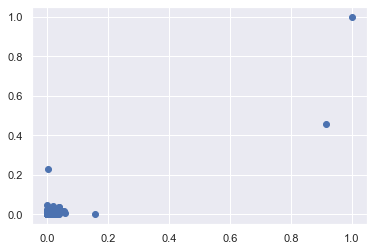

In [41]:
plt.scatter(norm_df["Quantity"], norm_df["TotalSum"])

In [37]:
#Choosing number of clusters using Elbow method

inertias = []
#inertia is an attribute of KMeans. It's the sum of squared distances of samples to their cluster center
#plot the numer of clusters against the inertia for each model with n number of clusters
distortions = []

for k in range(1,10):
    #build and fit the model
    model = KMeans(n_clusters=k, random_state=24)
    model.fit(X)
    
    #calculate distortion
    #average of squared distance from cluster center to data points
    #cdist() - calculate the distance from each point to cluster centers
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html

    distortion = sum(np.min(cdist(X,model.cluster_centers_, 'euclidean'), axis=1))/X.shape[0]
    # add to list
    distortions.append(distortion)
    
    inertia = model.inertia_
    inertias.append(inertia)


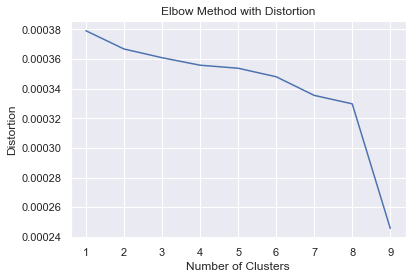

In [38]:
#plot an elbow graph
sns.set()
plt.plot(range(1,10), distortions)
plt.title('Elbow Method with Distortion')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

Optimum number of clusters is 8

In [45]:
#training kmeans clustering model

model= KMeans(n_clusters=4, random_state=42)
y_pred = model.fit_predict(X)
print(y_pred)

[0 0 0 ... 1 1 1]


In [ ]:
#plot the data to visualize the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c="green", label="Cluster 1")

# Method from Class

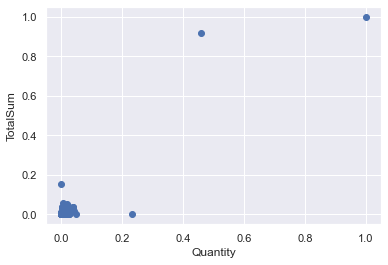

In [39]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# split data as X and y to plot it
X1 = norm_df.drop('Country', axis=1)
y1 = norm_df['Country']

plt.scatter(X1['TotalSum'], X1['Quantity'])


plt.xlabel('Quantity')
plt.ylabel('TotalSum')

plt.show()

In [40]:
inertias = []
#inertia is an attribute of KMeans. It's the sum of squared distances of samples to their cluster center
#plot the numer of clusters against the inertia for each model with n number of clusters
distortions = []

for k in range(1,10):
    #build and fit the model
    model = KMeans(n_clusters=k).fit(X1)
    
    #calculate distortion
    #average of squared distance from cluster center to data points
    #cdist() - calculate the distance from each point to cluster centers
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html

    distortion = sum(np.min(cdist(X1,model.cluster_centers_, 'euclidean'), axis=1))/X1.shape[0]
    # add to list
    distortions.append(distortion)
    
    inertia = model.inertia_
    inertias.append(inertia)

Text(0.5, 0, 'Number of Clusters')

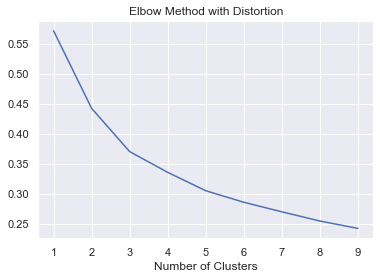

In [41]:
plt.plot(range(1,10), distortions)
plt.title('Elbow Method with Distortion')
plt.xlabel('Number of Clusters')

Optimum number of clusters is 3

In [42]:
model = KMeans(n_clusters=3)
model.fit(norm_df)

KMeans(n_clusters=3)

In [45]:
model.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

### Plot the results

<Figure size 720x504 with 0 Axes>

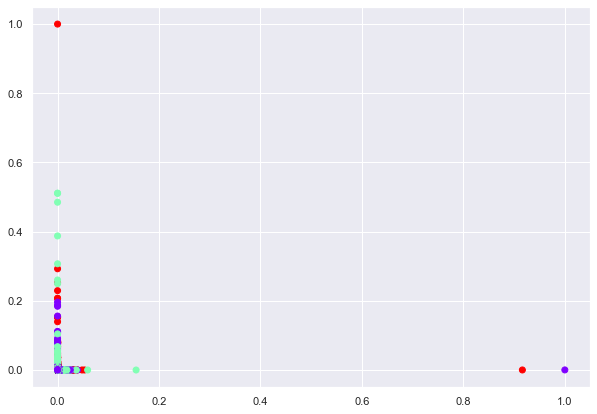

In [47]:
plt.figure(figsize=(10,7))
plt.scatter(norm_df["Quantity"], norm_df["UnitPrice"], c=model.labels_, cmap="rainbow")

# 5. Perform hierarchical clustering for customer segments. What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X, 'ward')
plt.figure(figsize=(10,7))
dendro = dendrogram(linked, labels=list(y))
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

# 6.Compare the results of 4 and 5. Which approach do you think is best? Why? 